## Unit 3, Lesson 3. Challenge

Engineer your features, then create three models. Each model will be run on a training set and a test-set (or multiple test-sets, if you take a folds approach). The models should be:

- Vanilla logistic regression
- Ridge logistic regression
- Lasso logistic regression


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
%matplotlib inline
sns.set_style('white')

In [2]:
df=pd.read_csv("../crx.data.txt", engine='python', header=None, names = [
"Male",
"Age",
"Debt",
"Married",
"BankCustomer",
"EducationLevel",
"Ethnicity",
"YearsEmployed",
"PriorDefault",
"Employed",
"CreditScore",
"DriversLicense",
"Citizen",
"ZipCode",
"Income",
"Approved",])

df = df.drop('ZipCode', axis=1);

In [3]:
# drop missing values
for col in df.columns:
    df = df[~df[col].isin(['?'])]

In [4]:
# transform coded values to binary
df.Approved.replace(['+', '-'], ['1', '0'], inplace=True)
df.Male.replace(['b', 'a'], ['0', '1'], inplace=True)
df.DriversLicense.replace(['t', 'f'], ['1', '0'], inplace=True)
df.Employed.replace(['t', 'f'], ['1', '0'], inplace=True)
df.PriorDefault.replace(['t', 'f'], ['1', '0'], inplace=True)

In [5]:
# convert str to float type for Age
df['Age'] = df.Age.astype('float')
df['Employed'] = df.Employed.astype('int')
df['PriorDefault'] = df.PriorDefault.astype('int')
df['DriversLicense'] = df.DriversLicense.astype('int')
df['Approved'] = df.Approved.astype('int')

In [6]:
df.head(3)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,0,30.83,0.00,u,g,w,v,1.25,1,1,1,0,g,0,1
1,1,58.67,4.46,u,g,q,h,3.04,1,1,6,0,g,560,1
2,1,24.50,0.50,u,g,q,h,1.50,1,0,0,0,g,824,1


In [7]:
df['YearsEmployed_Income'] = df['YearsEmployed'] * df['Income']
df['Income_sqrt'] = np.sqrt(df['Income'])
df['CreditScore2'] = df['CreditScore'] ** 2
df['Age2'] = df['Age'] ** 2
df['Debt3'] = df['Debt'] ** 3

In [8]:
df = pd.get_dummies(df)

In [9]:
Y = df['Approved']
X = df.loc[:, ~(df.columns).isin(['Approved'])]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

#### Vanilla Logistic Regression

In [11]:
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train.ravel())
lr.score(X_test, y_test)

0.85606060606060608

#### Ridge Regression

In [12]:
ridgeregrBig = linear_model.LogisticRegression(penalty='l2', C=10)
ridgeregrBig.fit(X_train, y_train)
ridgeregrBig.score(X_test, y_test)

0.85606060606060608

#### Lasso Regression

In [13]:
lassBig = linear_model.LogisticRegression(penalty='l1', C=.35)
lassBig.fit(X_train, y_train)
lassBig.score(X_test, y_test)

0.84848484848484851

### Comparing feature evaluation for all three models

In [72]:
lr_param = np.append(lr.coef_, lr.intercept_)
ridge_param = np.append(ridgeregrBig.coef_, ridgeregrBig.intercept_)
lass_param = np.append(lassBig.coef_, lassBig.intercept_)

titles = X_train.columns
titles = titles.tolist()
titles.append('Intercept')

In [85]:
pd.options.display.float_format = '{:,.2f}'.format

compare_df=pd.DataFrame(np.column_stack([lr_param, ridge_param, lass_param]), index = titles, columns=['lr_param','ridge_param', 'lass_param'])
print(compare_df.sort_index())

## use cross-validation to measure

                      lr_param  ridge_param  lass_param
Age                      -0.13        -0.12       -0.08
Age2                      0.00         0.00        0.00
BankCustomer_g            0.04         0.06       -0.62
BankCustomer_gg           0.05         0.04        0.64
BankCustomer_p           -0.27        -0.26       -1.50
Citizen_g                -0.19        -0.16       -0.20
Citizen_p                -0.01        -0.01        0.00
Citizen_s                 0.01         0.01       -0.21
CreditScore               0.13         0.14        0.09
CreditScore2             -0.00        -0.00       -0.00
Debt                     -0.03        -0.04       -0.00
Debt3                     0.00         0.00       -0.00
DriversLicense           -0.01        -0.01       -0.11
EducationLevel_aa        -0.13        -0.11       -0.22
EducationLevel_c         -0.11        -0.09       -0.05
EducationLevel_cc         0.33         0.28        1.43
EducationLevel_d         -0.13        -0.12     

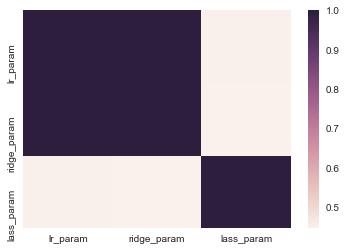

In [83]:
sns.heatmap(compare_df.corr());

Lasso shows different results at all! 

### Let's see how R^2  vary depending on lambda parameter in Ridge and Lasso

In [22]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

lr_r2 = [0.85606060606060608] * 300
rigde_r2 = []
lasso_r2 = []
lambd_values = []

for lambd in frange(0.01, 30, 0.1):
    ridgeregrBig = linear_model.LogisticRegression(penalty='l2', C=lambd)
    ridgeregrBig.fit(X_train, y_train)
    rigde_r2.append(ridgeregrBig.score(X_test, y_test))
    lassBig = linear_model.LogisticRegression(penalty='l1', C=lambd)
    lassBig.fit(X_train, y_train)
    lasso_r2.append(lassBig.score(X_test, y_test))
    lambd_values.append([lambd]) 

In [23]:
estimates_df = pd.DataFrame(np.column_stack([lambd_values, rigde_r2, lasso_r2]), 
                               columns=['lambda','rigde_r2', 'lasso_r2'])

In [24]:
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

In [25]:
estimates_df.describe()

,lambda,rigde_r2,lasso_r2
count,300.000000,300.000000,300.000000
mean,14.960000,0.854369,0.854874
std,8.674676,0.011983,0.009555
min,0.010000,0.757576,0.696970
25%,7.485000,0.848485,0.856061
50%,14.960000,0.856061,0.856061
75%,22.435000,0.863636,0.856061
max,29.910000,0.863636,0.863636


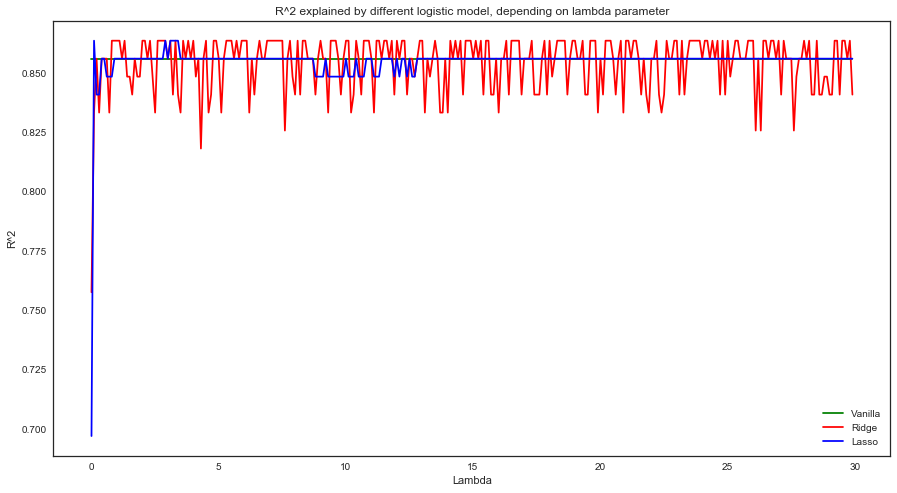

In [26]:
plt.figure(figsize=(15,8))
plt.plot(lambd_values, lr_r2, 'g', 
         lambd_values, rigde_r2, 'r', 
         lambd_values, lasso_r2, 'b')
plt.xlabel('Lambda')
plt.ylabel('R^2')
plt.legend(['Vanilla',
            'Ridge','Lasso'])
plt.title('R^2 explained by different logistic model, depending on lambda parameter')
plt.show()

Learnings: 
- Lasso is preferable in our case - has less variance (overfits less), quite stable, mean of R^2 is slightly higher than other methods. 
- Ridge fluctuates more and is quite chaotic, ups and downs with slight changes in the penatly parameter 
- Scale of lambdas is different (not shown on the graph here, seen through experimentation): Lasso is more adequate with lower values of lambda, whereas Ridge can produce significant results with values of lambda being hungreds or thousands 